# Crypto Data

Kyendy Mauwi

In [1]:
# Access to Coin Market Cap API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'KES' # Show in Kenyan Shilling
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-09-17T10:27:56.202Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9090}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10469, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
# Normalizing for better analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.KES.price,quote.KES.volume_24h,quote.KES.volume_change_24h,quote.KES.percent_change_1h,quote.KES.percent_change_24h,quote.KES.percent_change_7d,quote.KES.percent_change_30d,quote.KES.percent_change_60d,quote.KES.percent_change_90d,quote.KES.market_cap,quote.KES.market_cap_dominance,quote.KES.fully_diluted_market_cap,quote.KES.tvl,quote.KES.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948819e+07,1.948819e+07,False,NaN,1,NaN,NaN,None,2023-09-17T10:25:00.000Z,3.869305e+06,9.432136e+11,-42.6368,0.139036,0.269463,3.012896,0.580469,-11.337094,0.743969,7.540575e+13,48.9268,8.125539e+13,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202244e+08,1.202244e+08,True,NaN,2,NaN,NaN,None,2023-09-17T10:25:00.000Z,2.377804e+05,3.852685e+11,-39.2719,0.142791,-0.065514,0.725202,-3.018411,-14.355409,-5.262438,2.858701e+13,18.5488,2.858701e+13,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,62379,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.304192e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-17T10:25:00.000Z,1.455442e+02,1.789965e+12,-37.2418,0.001206,-0.014413,0.050871,0.077399,0.021964,0.077898,1.208627e+13,7.8430,1.243489e+13,None,2023-09-17T10:26:05.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1624,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538483e+08,1.538483e+08,False,NaN,4,NaN,NaN,None,2023-09-17T10:25:00.000Z,3.129055e+04,4.713694e+10,-47.7288,0.027800,0.381285,1.125210,-1.529947,-11.037864,-11.378582,4.813999e+12,3.1237,4.813999e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.317540e+10,9.998843e+10,False,NaN,5,NaN,NaN,None,2023-09-17T10:25:00.000Z,7.236891e+01,7.123391e+10,-34.2516,0.090500,-0.715399,-0.487969,-1.435496,-37.040493,1.683684,3.848246e+12,2.4972,7.236891e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.616409e+10,2.616409e+10,False,NaN,6,NaN,NaN,None,2023-09-17T10:25:00.000Z,1.455204e+02,2.225329e+11,-39.7455,-0.001770,-0.026463,0.001180,0.019973,0.020887,0.018473,3.807410e+12,2.4704,3.807410e+12,None,2023-09-17T10:26:05.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.510829e+10,3.616798e+10,False,NaN,7,NaN,NaN,None,2023-09-17T10:25:00.000Z,3.642887e+01,1.155414e+10,-37.9274,0.274929,-0.144238,0.207377,-5.048107,-20.976421,-3.393121,1.278955e+12,0.8299,1.639299e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.410430e+11,1.410430e+11,True,NaN,8,NaN,NaN,None,2023-09-17T10:25:00.000Z,9.065324e+00,2.026786e+10,-18.6231,0.145371,-0.017987,0.633062,-0.318521,-9.445307,0.583050,1.278601e+12,0.8297,1.278601e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN
8,11419,Toncoin,TON,toncoin,143,2021-08-26T13:40:22.000Z,"[pos, ftx-bankruptcy-estate, dwf-labs-portfoli...",NaN,3.431892e+09,5.047559e+09,True,NaN,9,3.414167e+09,8.399528e+09,None,2023-09-17T10:25:00.000Z,3.579372e+02,1.193966e+10,16.7173,0.992917,12.445687,40.027746,84.688625,79.680422,75.708854,1.228402e+12,0

In [4]:
# Inlude local timestamp
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.KES.price,quote.KES.volume_24h,quote.KES.volume_change_24h,quote.KES.percent_change_1h,quote.KES.percent_change_24h,quote.KES.percent_change_7d,quote.KES.percent_change_30d,quote.KES.percent_change_60d,quote.KES.percent_change_90d,quote.KES.market_cap,quote.KES.market_cap_dominance,quote.KES.fully_diluted_market_cap,quote.KES.tvl,quote.KES.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948819e+07,1.948819e+07,False,NaN,1,NaN,NaN,None,2023-09-17T10:25:00.000Z,3.869305e+06,9.432136e+11,-42.6368,0.139036,0.269463,3.012896,0.580469,-11.337094,0.743969,7.540575e+13,48.9268,8.125539e+13,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202244e+08,1.202244e+08,True,NaN,2,NaN,NaN,None,2023-09-17T10:25:00.000Z,2.377804e+05,3.852685e+11,-39.2719,0.142791,-0.065514,0.725202,-3.018411,-14.355409,-5.262438,2.858701e+13,18.5488,2.858701e+13,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
2,825,Tether USDt,USDT,tether,62379,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.304192e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-17T10:25:00.000Z,1.455442e+02,1.789965e+12,-37.2418,0.001206,-0.014413,0.050871,0.077399,0.021964,0.077898,1.208627e+13,7.8430,1.243489e+13,None,2023-09-17T10:26:05.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-17 13:27:56.252254
3,1839,BNB,BNB,bnb,1624,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538483e+08,1.538483e+08,False,NaN,4,NaN,NaN,None,2023-09-17T10:25:00.000Z,3.129055e+04,4.713694e+10,-47.7288,0.027800,0.381285,1.125210,-1.529947,-11.037864,-11.378582,4.813999e+12,3.1237,4.813999e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.317540e+10,9.998843e+10,False,NaN,5,NaN,NaN,None,2023-09-17T10:25:00.000Z,7.236891e+01,7.123391e+10,-34.2516,0.090500,-0.715399,-0.487969,-1.435496,-37.040493,1.683684,3.848246e+12,2.4972,7.236891e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.616409e+10,2.616409e+10,False,NaN,6,NaN,NaN,None,2023-09-17T10:25:00.000Z,1.455204e+02,2.225329e+11,-39.7455,-0.001770,-0.026463,0.001180,0.019973,0.020887,0.018473,3.807410e+12,2.4704,3.807410e+12,None,2023-09-17T10:26:05.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-17 13:27:56.252254
6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.510829e+10,3.616798e+10,False,NaN,7,NaN,NaN,None,2023-09-17T10:25:00.000Z,3.642887e+01,1.155414e+10,-37.9274,0.274929,-0.144238,0.207377,-5.048107,-20.976421,-3.393121,1.278955e+12,0.8299,1.639299e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.410430e+11,1.410430e+11,True,NaN,8,NaN,NaN,None,2023-09-17T10:25:00.000Z,9.065324e+00,2.026786e+10,-18.6231,0.145371,-0.017987,0.633062,-0.318521,-9.445307,0.583050,1.278601e+12,0.8297,1.278601e+12,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
8,11419,Toncoin,TON,toncoin,143,2021-08-26T13:40:22.000Z,"[pos, ftx-bankruptcy-estate, 

In [5]:
# Create function to run the api for automation
def api_runner():
    global df # removes error in next code block
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'KES'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Append to df2
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
#     df = df.append(df2)
#     return df2

    # Saving to csv file
    if not os.path.isfile(r'C:\Users\USER\OneDrive\Desktop\Africa Data school\Project\Crypto Project\Data\Cryptodata.csv'):
        df.to_csv(r'C:\Users\USER\OneDrive\Desktop\Africa Data school\Project\Crypto Project\Data\Cryptodata.csv', header = 'column_names')
    else:
         df.to_csv(r'C:\Users\USER\OneDrive\Desktop\Africa Data school\Project\Crypto Project\Data\Cryptodata.csv', mode = 'a', header = False)

In [6]:
# import os
# from time import time
# from time import sleep

# for i in range(333):  # We have 333 runs in the API
# #     result = api_runner()
# #     if result is not None:
# #         df = pd.concat([df, result])
#     api_runner()
#     print("Function completed successfully")
#     sleep(60)
# exit()

Due to time limitation, data will mostly be quoted on 1hr percentage change

In [7]:
# import os
# from time import time, sleep

# # Define the maximum run time in seconds (60 minutes = 3600 seconds)
# max_run_time = 3600

# # Record the start time
# start_time = time()

# for i in range(333):  # We have 333 runs in the API
#     api_runner()
#     print("Function completed successfully")
#     sleep(300)

#     # Calculate the elapsed time
#     elapsed_time = time() - start_time

#     # Check if the elapsed time exceeds the maximum run time
#     if elapsed_time >= max_run_time:
#         print("Maximum run time reached. Exiting the loop.")
#         break

# exit()


In [8]:
df3 = pd.read_csv('Data\Cryptodata.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.KES.price,quote.KES.volume_24h,quote.KES.volume_change_24h,quote.KES.percent_change_1h,quote.KES.percent_change_24h,quote.KES.percent_change_7d,quote.KES.percent_change_30d,quote.KES.percent_change_60d,quote.KES.percent_change_90d,quote.KES.market_cap,quote.KES.market_cap_dominance,quote.KES.fully_diluted_market_cap,quote.KES.tvl,quote.KES.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.948809e+07,1.948809e+07,False,NaN,1,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,3.863995e+06,9.614958e+11,-41.4454,0.146263,0.127490,2.744959,-0.003127,-11.323238,0.581938,7.530188e+13,48.9289,8.114390e+13,NaN,2023-09-17T09:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 12:15:04.217708
1,1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202244e+08,1.202244e+08,True,NaN,2,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,2.373924e+05,3.926202e+11,-37.6247,0.131790,-0.217899,0.406145,-3.491540,-14.427723,-5.290115,2.854036e+13,18.5465,2.854036e+13,NaN,2023-09-17T09:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 12:15:04.217708
2,2,825,Tether USDt,USDT,tether,62379,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.304192e+10,8.543720e+10,True,NaN,3,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,1.455075e+02,1.830990e+12,-35.9034,-0.021545,-0.013278,0.030313,0.054767,0.001698,0.040402,1.208322e+13,7.8516,1.243175e+13,NaN,2023-09-17T09:14:05.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-17 12:15:04.217708
3,3,1839,BNB,BNB,bnb,1624,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538483e+08,1.538483e+08,False,NaN,4,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,3.128354e+04,4.839928e+10,-47.2414,0.210980,0.479346,1.066432,-1.780356,-10.897235,-11.462892,4.812921e+12,3.1274,4.812921e+12,NaN,2023-09-17T09:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 12:15:04.217708
4,4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.317540e+10,9.998843e+10,False,NaN,5,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,7.236201e+01,7.376722e+10,-32.4457,0.336181,-0.626514,-0.462410,-2.355301,-36.116992,1.959263,3.847879e+12,2.5003,7.236201e+12,NaN,2023-09-17T09:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 12:15:04.217708
5,5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.616410e+10,2.616410e+10,False,NaN,6,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,1.454899e+02,2.278914e+11,-38.2734,-0.017132,-0.024766,-0.010682,-0.004388,0.007076,-0.009608,3.806612e+12,2.4734,3.806612e+12,NaN,2023-09-17T09:14:05.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-17 12:15:04.217708
6,6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.410419e+11,1.410419e+11,True,NaN,7,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,9.056055e+00,2.068278e+10,-15.1346,0.045754,-0.043943,0.534055,-0.535989,-9.333988,0.521403,1.277283e+12,0.8300,1.277283e+12,NaN,2023-09-17T09:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 12:15:04.217708
7,7,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.510829e+10,3.616798e+10,False,NaN,8,NaN,NaN,NaN,2023-09-17T09:13:00.000Z,3.630151e+01,1.164740e+10,-37.6834,0.296352,-0.467885,0.033739,-5.393188,-20.585803,-3.577798,1.274484e+12,0.8282,1.633568e+12,NaN,2023-09-17T09:14:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 12:15:04.217708
8,8,11419,Toncoin,TON,toncoin,143,2021-08-26T13:40:22.000Z,"['pos', 'ft

In [9]:
# cleaning
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.KES.price,quote.KES.volume_24h,quote.KES.volume_change_24h,quote.KES.percent_change_1h,quote.KES.percent_change_24h,quote.KES.percent_change_7d,quote.KES.percent_change_30d,quote.KES.percent_change_60d,quote.KES.percent_change_90d,quote.KES.market_cap,quote.KES.market_cap_dominance,quote.KES.fully_diluted_market_cap,quote.KES.tvl,quote.KES.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19488193.00000,19488193.00000,False,NaN,1,NaN,NaN,None,2023-09-17T10:25:00.000Z,3869304.51573,943213615951.70654,-42.63680,0.13904,0.26946,3.01290,0.58047,-11.33709,0.74397,75405753178235.21875,48.92680,81255394830241.70312,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
1,1027,Ethereum,ETH,ethereum,7394,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120224406.72280,120224406.72280,True,NaN,2,NaN,NaN,None,2023-09-17T10:25:00.000Z,237780.40494,385268542330.97778,-39.27190,0.14279,-0.06551,0.72520,-3.01841,-14.35541,-5.26244,28587008114262.81641,18.54880,28587008114263.47266,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
2,825,Tether USDt,USDT,tether,62379,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83041923535.66393,85437198726.47841,True,NaN,3,NaN,NaN,None,2023-09-17T10:25:00.000Z,145.54423,1789965001242.90308,-37.24180,0.00121,-0.01441,0.05087,0.07740,0.02196,0.07790,12086272781273.59180,7.84300,12434891263479.48438,None,2023-09-17T10:26:05.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-17 13:27:56.252254
3,1839,BNB,BNB,bnb,1624,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153848307.79472,153848307.79472,False,NaN,4,NaN,NaN,None,2023-09-17T10:25:00.000Z,31290.55243,47136937552.09575,-47.72880,0.02780,0.38129,1.12521,-1.52995,-11.03786,-11.37858,4813998541948.71680,3.12370,4813998541948.34570,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
4,52,XRP,XRP,xrp,1086,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53175400720.00000,99988428101.00000,False,NaN,5,NaN,NaN,None,2023-09-17T10:25:00.000Z,72.36891,71233906977.91269,-34.25160,0.09050,-0.71540,-0.48797,-1.43550,-37.04049,1.68368,3848245632222.41748,2.49720,7236890705319.80566,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
5,3408,USD Coin,USDC,usd-coin,14109,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26164093969.09088,26164093969.09088,False,NaN,6,NaN,NaN,None,2023-09-17T10:25:00.000Z,145.52041,222532895715.22116,-39.74550,-0.00177,-0.02646,0.00118,0.01997,0.02089,0.01847,3807409555814.15967,2.47040,3807409555813.87988,None,2023-09-17T10:26:05.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-17 13:27:56.252254
6,2010,Cardano,ADA,cardano,934,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35108285813.33500,36167977941.12500,False,NaN,7,NaN,NaN,None,2023-09-17T10:25:00.000Z,36.42887,11554140773.64647,-37.92740,0.27493,-0.14424,0.20738,-5.04811,-20.97642,-3.39312,1278955006027.88306,0.82990,1639298927245.68677,None,2023-09-17T10:26:05.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-17 13:27:56.252254
7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141043036383.70520,141043036383.70520,True,NaN,8,NaN,NaN,None,2023-09-17T10:25:00.000Z,9.06532,20267858225.16525,-18.62310,0.14537,-0.01799,0.63306,-0.31852,-9.44531,0.58305,12786007896

In [10]:
# grouping
df4 = df.groupby('name', sort = False)[['quote.KES.percent_change_1h', 'quote.KES.percent_change_24h', 'quote.KES.percent_change_7d', 'quote.KES.percent_change_30d', 'quote.KES.percent_change_60d', 'quote.KES.percent_change_90d']].mean()
df4

,quote.KES.percent_change_1h,quote.KES.percent_change_24h,quote.KES.percent_change_7d,quote.KES.percent_change_30d,quote.KES.percent_change_60d,quote.KES.percent_change_90d
name,,,,,,
Bitcoin,0.13904,0.26946,3.01290,0.58047,-11.33709,0.74397
Ethereum,0.14279,-0.06551,0.72520,-3.01841,-14.35541,-5.26244
Tether USDt,0.00121,-0.01441,0.05087,0.07740,0.02196,0.07790
BNB,0.02780,0.38129,1.12521,-1.52995,-11.03786,-11.37858
XRP,0.09050,-0.71540,-0.48797,-1.43550,-37.04049,1.68368
USD Coin,-0.00177,-0.02646,0.00118,0.01997,0.02089,0.01847
Cardano,0.27493,-0.14424,0.20738,-5.04811,-20.97642,-3.39312
Dogecoin,0.14537,-0.01799,0.63306,-0.31852,-9.44531,0.58305
Toncoin,0.99292,12.44569,40.02775,84.68863,79.68042,75.70885


In [11]:
# Stacking; pivoting doesn't work for this
df5 = df4.stack()
df5

name                                         
Bitcoin          quote.KES.percent_change_1h      0.13904
                 quote.KES.percent_change_24h     0.26946
                 quote.KES.percent_change_7d      3.01290
                 quote.KES.percent_change_30d     0.58047
                 quote.KES.percent_change_60d   -11.33709
                 quote.KES.percent_change_90d     0.74397
Ethereum         quote.KES.percent_change_1h      0.14279
                 quote.KES.percent_change_24h    -0.06551
                 quote.KES.percent_change_7d      0.72520
                 quote.KES.percent_change_30d    -3.01841
                 quote.KES.percent_change_60d   -14.35541
                 quote.KES.percent_change_90d    -5.26244
Tether USDt      quote.KES.percent_change_1h      0.00121
                 quote.KES.percent_change_24h    -0.01441
                 quote.KES.percent_change_7d      0.05087
                 quote.KES.percent_change_30d     0.07740
                 quote.KES

In [12]:
# Convert from series to dataframe
df6 = df5.to_frame(name='values')
df6

values
name                                                  
Bitcoin         quote.KES.percent_change_1h    0.13904
                quote.KES.percent_change_24h   0.26946
                quote.KES.percent_change_7d    3.01290
                quote.KES.percent_change_30d   0.58047
                quote.KES.percent_change_60d -11.33709
                quote.KES.percent_change_90d   0.74397
Ethereum        quote.KES.percent_change_1h    0.14279
                quote.KES.percent_change_24h  -0.06551
                quote.KES.percent_change_7d    0.72520
                quote.KES.percent_change_30d  -3.01841
                quote.KES.percent_change_60d -14.35541
                quote.KES.percent_change_90d  -5.26244
Tether USDt     quote.KES.percent_change_1h    0.00121
                quote.KES.percent_change_24h  -0.01441
                quote.KES.percent_change_7d    0.05087
                quote.KES.percent_change_30d   0.07740
                quote.KES.percent_change_60d   0.02196
                quote.KES.percent_change_90d   0.07790
BNB             quote.KES.percent_change_1h    0.02780
                quote.KES.percent_change_24h   0.38129
                quote.KES.percent_change_7d    1.12521
                quote.KES.percent_change_30d  -1.52995
                quote.KES.percent_change_60d -11.03786
                quote.KES.percent_change_90d -11.37858
XRP             quote.KES.percent_change_1h    0.09050
                quote.KES.percent_change_24h  -0.71540
                quote.KES.percent_change_7d   -0.48797
                quote.KES.percent_change_30d  -1.43550
                quote.KES.percent_change_60d -37.04049
                quote.KES.percent_change_90d   1.68368
USD Coin        quote.KES.percent_change_1h   -0.00177
                quote.KES.percent_change_24h  -0.02646
                quote.KES.percent_change_7d    0.00118
                quote.KES.percent_change_30d   0.01997
                quote.KES.percent_change_60d   0.02089
                quote.KES.percent_change_90d   0.01847
Cardano         quote.KES.percent_change_1h    0.27493
                quote.KES.percent_change_24h  -0.14424
                quote.KES.percent_change_7d    0.20738
                quote.KES.percent_change_30d  -5.04811
                quote.KES.percent_change_60d -20.97642
                quote.KES.percent_change_90d  -3.39312
Dogecoin        quote.KES.percent_change_1h    0.14537
                quote.KES.percent_change_24h  -0.01799
                quote.KES.percent_change_7d    0.63306
                quote.KES.percent_change_30d  -0.31852
                quote.KES.percent_change_60d  -9.44531
                quote.KES.percent_change_90d   0.58305
Toncoin         quote.KES.percent_change_1h    0.99292
                quote.KES.percent_change_24h  12.44569
                quote.KES.percent_change_7d   40.02775
                quote.KES.percent_change_30d  84.68863
                quote.KES.percent_change_60d  79.68042
                quote.KES.percent_change_90d  75.70885
Solana          quote.KES.percent_change_1h    0.52940
                quote.KES.percent_change_24h  -0.42950
                quote.KES.percent_change_7d    3.65735
                quote.KES.percent_change_30d -13.37984
                quote.KES.percent_change_60d -27.48842
                quote.KES.percent_change_90d  22.93920
TRON            quote.KES.percent_change_1h    0.07402
                quote.KES.percent_change_24h  -0.06965
                quote.KES.percent_change_7d    6.43652
                quote.KES.percent_change_30d  14.78316
                quote.KES.percent_change_60d   4.61178
                quote.KES.percent_change_90d  19.71433
Dai             quote.KES.percent_change_1h    0.01785
                quote.KES.percent_change_24h   0.04476
                quote.KES.percent_change_7d    0.05602
                quote.KES.percent_change_30d   0.08773
                quote.KES.percent_change_60d   0.05057
                quote.KES.percent

In [13]:
print(df6.count)

<bound method DataFrame.count of                                                 values
name                                                  
Bitcoin         quote.KES.percent_change_1h    0.13904
                quote.KES.percent_change_24h   0.26946
                quote.KES.percent_change_7d    3.01290
                quote.KES.percent_change_30d   0.58047
                quote.KES.percent_change_60d -11.33709
                quote.KES.percent_change_90d   0.74397
Ethereum        quote.KES.percent_change_1h    0.14279
                quote.KES.percent_change_24h  -0.06551
                quote.KES.percent_change_7d    0.72520
                quote.KES.percent_change_30d  -3.01841
                quote.KES.percent_change_60d -14.35541
                quote.KES.percent_change_90d  -5.26244
Tether USDt     quote.KES.percent_change_1h    0.00121
                quote.KES.percent_change_24h  -0.01441
                quote.KES.percent_change_7d    0.05087
                quote.KES.percen

In [14]:
# indexing by creating a new column
index = pd.Index(range(700))
# index = pd.RangeIndex(start=0, stop=700, step=1)
# df7 = df6.set_index(index)
# df7 = df6.copy()
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.KES.percent_change_1h,0.13904
1,Bitcoin,quote.KES.percent_change_24h,0.26946
2,Bitcoin,quote.KES.percent_change_7d,3.01290
3,Bitcoin,quote.KES.percent_change_30d,0.58047
4,Bitcoin,quote.KES.percent_change_60d,-11.33709
5,Bitcoin,quote.KES.percent_change_90d,0.74397
6,Ethereum,quote.KES.percent_change_1h,0.14279
7,Ethereum,quote.KES.percent_change_24h,-0.06551
8,Ethereum,quote.KES.percent_change_7d,0.72520
9,Ethereum,quote.KES.percent_change_30d,-3.01841


In [15]:
# Renaming columns
df8 = df7.rename(columns = {'level_1' : 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.KES.percent_change_1h,0.13904
1,Bitcoin,quote.KES.percent_change_24h,0.26946
2,Bitcoin,quote.KES.percent_change_7d,3.01290
3,Bitcoin,quote.KES.percent_change_30d,0.58047
4,Bitcoin,quote.KES.percent_change_60d,-11.33709
5,Bitcoin,quote.KES.percent_change_90d,0.74397
6,Ethereum,quote.KES.percent_change_1h,0.14279
7,Ethereum,quote.KES.percent_change_24h,-0.06551
8,Ethereum,quote.KES.percent_change_7d,0.72520
9,Ethereum,quote.KES.percent_change_30d,-3.01841


In [16]:
print(df8.columns)

Index(['name', 'percent_change', 'values'], dtype='object')


In [17]:
df8['percent_change'] = df8['percent_change'].replace(['quote.KES.percent_change_1h', 'quote.KES.percent_change_24h', 'quote.KES.percent_change_7d', 'quote.KES.percent_change_30d', 'quote.KES.percent_change_60d', 'quote.KES.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.13904
1,Bitcoin,24h,0.26946
2,Bitcoin,7d,3.01290
3,Bitcoin,30d,0.58047
4,Bitcoin,60d,-11.33709
5,Bitcoin,90d,0.74397
6,Ethereum,1h,0.14279
7,Ethereum,24h,-0.06551
8,Ethereum,7d,0.72520
9,Ethereum,30d,-3.01841


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

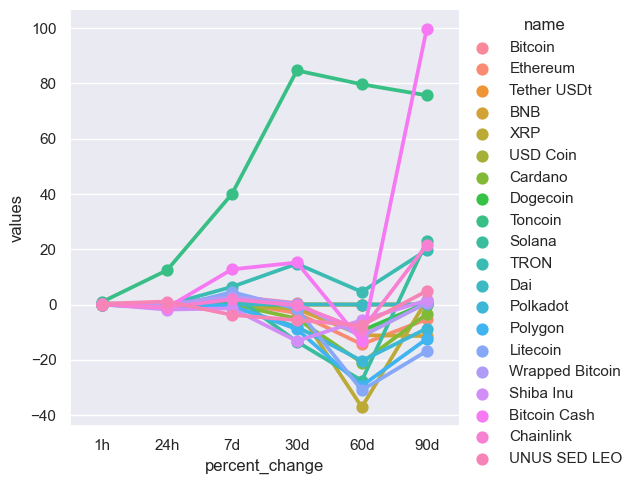

In [19]:
sns.set_theme(style='darkgrid')
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [20]:
df9 = df[['name', 'quote.KES.price', 'timestamp']]
df9

,name,quote.KES.price,timestamp
0,Bitcoin,3869304.51573,2023-09-17 13:27:56.252254
1,Ethereum,237780.40494,2023-09-17 13:27:56.252254
2,Tether USDt,145.54423,2023-09-17 13:27:56.252254
3,BNB,31290.55243,2023-09-17 13:27:56.252254
4,XRP,72.36891,2023-09-17 13:27:56.252254
5,USD Coin,145.52041,2023-09-17 13:27:56.252254
6,Cardano,36.42887,2023-09-17 13:27:56.252254
7,Dogecoin,9.06532,2023-09-17 13:27:56.252254
8,Toncoin,357.93719,2023-09-17 13:27:56.252254
9,Solana,2774.29225,2023-09-17 13:27:56.252254
